In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [ ]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit, KFold, StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn import svm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

#path_train = ... # содержит только имя файла, без имен папок !!!

In [3]:
path_train = 'train_house_A.csv'
df = pd.read_csv(path_train)
df.describe()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.030652,0.0,-0.021898,-0.004470,-0.044734,-0.015345,-0.037179,0.005930,-0.005686,...,-0.046552,-0.022184,-0.042466,0.017890,-0.043530,-0.039454,-0.038181,-0.048110,-0.025252,-0.044926
std,1.711368e+06,1.031893,0.0,1.019428,0.974612,0.969756,0.996282,1.001595,0.976837,1.007006,...,0.991383,1.020601,0.995270,1.016147,0.900616,0.975409,1.031259,1.008422,1.001805,0.913917
min,1.750000e+06,-2.465344,0.0,-1.224688,-1.780233,-2.633407,-0.734539,-1.614530,-0.570187,-4.050087,...,-1.705711,-2.319351,-2.665004,-1.406286,-0.219265,-0.554035,-5.000645,-1.789595,-1.705457,-3.418780
25%,3.430000e+06,0.405623,0.0,-0.673496,-0.837351,-0.223185,-0.734539,-0.745125,-0.570187,-0.478408,...,-0.881357,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,-0.126718,-0.896013,-0.887341,-0.141322
50%,4.270000e+06,0.405623,0.0,-0.252391,0.032263,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,...,-0.072463,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,-0.047954,-0.050893,-0.141322
75%,5.600000e+06,0.405623,0.0,0.312075,0.775898,-0.223185,1.361397,0.454055,1.421812,1.307431,...,0.755884,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.006287,0.787204,0.798591,-0.141322
max,1.141000e+07,0.405623,0.0,8.604753,1.732550,13.826353,1.361397,5.096263,3.413810,3.093270,...,1.745647,7.957450,4.115701,1.222962,4.560702,1.804941,13.021551,1.732996,1.771548,3.136137


In [4]:
# Проверка наличия пропущенных значений в каждом столбце DataFrame
missing_values = df.isnull().sum()

# Вывод количества пропущенных значений по столбцам
print(missing_values)

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64


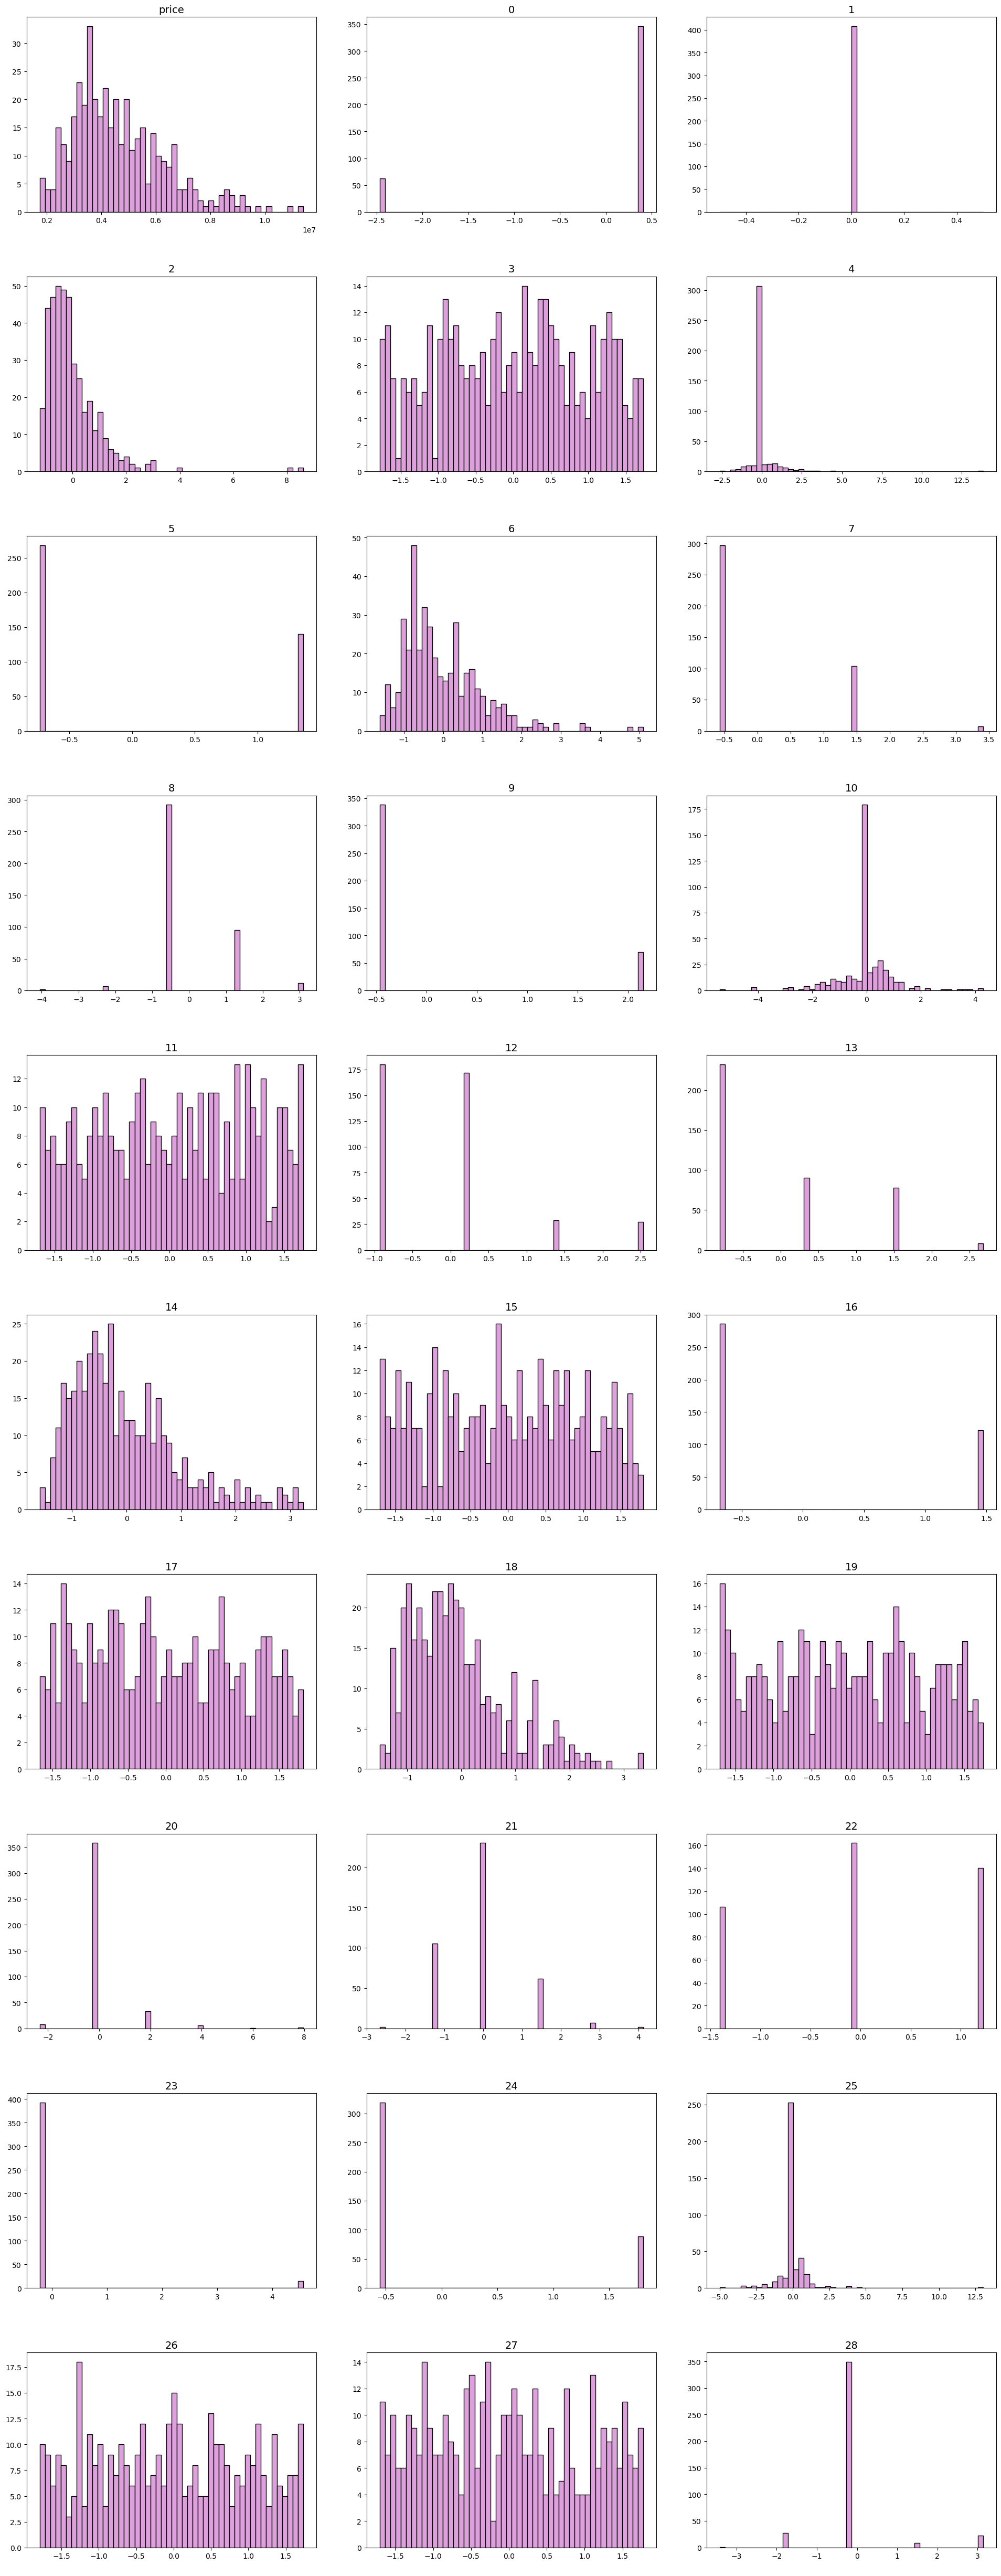

In [5]:
# Выделение числовых столбцов
numeric_columns = df.select_dtypes(include=np.number).columns

# Определение количества строк и столбцов для графиков
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Устанавливаем размер фигуры
plt.figure(figsize=(20, 5 * n_rows))

# Рисуем гистограммы для каждого числового столбца
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[col], bins=50, color='plum', edgecolor='black')
    plt.title(f'{col}', fontsize=14)
    plt.xlabel(' ', fontsize=12)
    plt.ylabel('', fontsize=12)

plt.tight_layout(pad=4)

# Показываем график
plt.show()

In [6]:
# Подготовка данных
X = df.drop(columns=['price'])  # Исходные признаки
y = df['price']  # Целевая переменная

Форма обучающего набора X: (326, 29)
Форма обучающего набора X после отбора признаков: (326, 15)


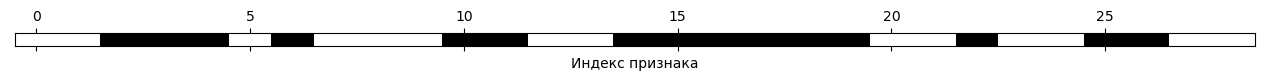

Выбранные признаки:
 Index(['2', '3', '4', '6', '10', '11', '14', '15', '16', '17', '18', '19',
       '22', '25', '26'],
      dtype='object')


In [7]:
from sklearn.feature_selection import SelectFromModel

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создаем модель RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

# Создаем селектор признаков на основе модели
selector = SelectFromModel(forest, threshold='median')

# Обучаем селектор и трансформируем обучающий набор данных
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)

# Вывод формы наборов данных
print("Форма обучающего набора X: {}".format(X_train.shape))
print("Форма обучающего набора X после отбора признаков: {}".format(X_train_selected.shape))

# Визуализация выбранных признаков
mask = selector.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака")
plt.show()

# Получение имен выбранных признаков
selected_features = X.columns[mask]
print("Выбранные признаки:\n", selected_features)

In [ ]:
#
## Обучаем случайный лес, чтобы оценить важность признаков
#forest = RandomForestRegressor(n_estimators=100)
#forest.fit(X_train, y_train)
#
## Получаем важности признаков
#importances = forest.feature_importances_
#
## Определяем порог для важности признаков
#threshold = np.sort(importances)[-20]  # Например, выбираем порог так, чтобы взять 20 самых важных признаков
#
## Выбираем признаки, важность которых выше порога
#selected_features = X.columns[importances >= threshold]
#
## Визуализация важности признаков
#plt.barh(range(len(importances)), importances)
#plt.yticks(range(len(X.columns)), X.columns)
#plt.show()
#
#print("Выбранные признаки:\n", selected_features)


In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#
## Подготовка данных
#X = df.drop(columns=['price'])
#y = df['price']
#
## Разделение данных на обучающую и тестовую выборки
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
#
## Обучаем случайный лес, чтобы оценить важность признаков
#forest = RandomForestRegressor(n_estimators=100)
#forest.fit(X_train, y_train)
#
## Получаем важности признаков
#importances = forest.feature_importances_
#
## Выбираем признаки, чья важность выше среднего
#average_importance = np.mean(importances)
#selected_features = X.columns[importances > average_importance]
#
#print("Выбранные признаки:\n", selected_features)


In [8]:
features = ['2', '3', '4', '6', '10', '11', '14', '15', '16', '17', '18', '19',
       '22', '25', '26']

In [9]:
# Теперь мы создаем новый DataFrame с отобранными важными признаками
X_important = df[features]
y = df['price']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2)

In [10]:
# Масштабирование числовых признаков
scaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Создание ColumnTransformer
CT = ColumnTransformer(
    transformers=[
        ('num', scaler_transformer, features)
    ])



# Применение ColumnTransformer к обучающим и тестовым данным
X_train_ct = CT.fit_transform(X_train)
X_test_ct = CT.transform(X_test)

In [11]:
parameters = [
    {
        'regressor': [LinearRegression()]
    },
    {
        'regressor': [DecisionTreeRegressor()],
        'regressor__criterion':['squared_error','absolute_error'],
        'regressor__min_samples_leaf':[1,2,3]
    },
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__p':[1,2,3]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__learning_rate': [0.01, 0.1, 0.2],  # Добавление различных значений learning_rate
        'regressor__n_estimators': [100, 500, 1000],   # Добавление различных значений n_estimators
        'regressor__subsample': [0.5, 0.7, 1.0]        # Добавление различных значений subsample
    },
    {
        'regressor': [RandomForestRegressor()]
    }
]
pipe = Pipeline([('regressor', KNeighborsRegressor())])

In [12]:
grid = GridSearchCV(pipe, parameters, return_train_score = True)
grid.fit(X_train_ct, y_train)    

print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test_ct, y_test))

Наилучшие параметры: {'regressor': RandomForestRegressor()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.462456258120506
Правильность для наилучшей модели на тестовом наборе: 0.3882779792440748


In [13]:
sc = RandomForestRegressor()
sc.fit(X_train_ct, y_train)
predictions = sc.predict(X_test_ct)

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
# Расчет MAPE
mape = mean_absolute_percentage_error(y_test, predictions) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)


MAPE (Mean Absolute Percentage Error): 21.955504144810437
